<a href="https://colab.research.google.com/github/Drkareemkamal/LGMVIP_DataScience_task1_Iris_Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/iris.zip

Archive:  /content/iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


# Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

## load Data using `pd.read_csv`

In [20]:
df = pd.read_csv('/content/iris.data',
                 names=['sepal length','sepal width','petal length','petal width','class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect data
  - check data types
  - check mean median mode outliers
  - check missing value

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [142]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check missing Values

In [143]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

## Check target label numbers it should be balanced between different classes

In [21]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [33]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='class'>

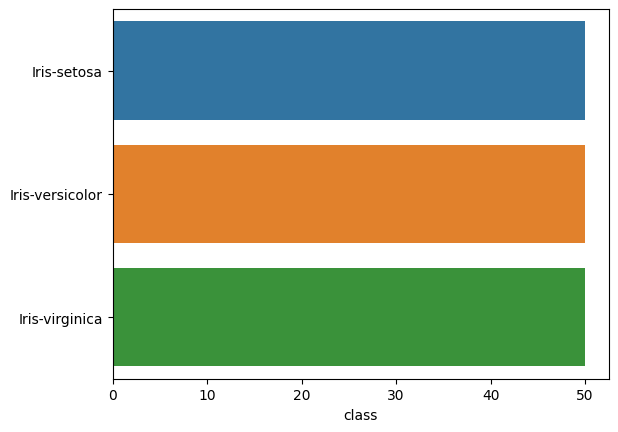

In [34]:
sns.barplot(x=df['class'].value_counts(),y=df['class'].unique(),data=df)

## Data Visualization

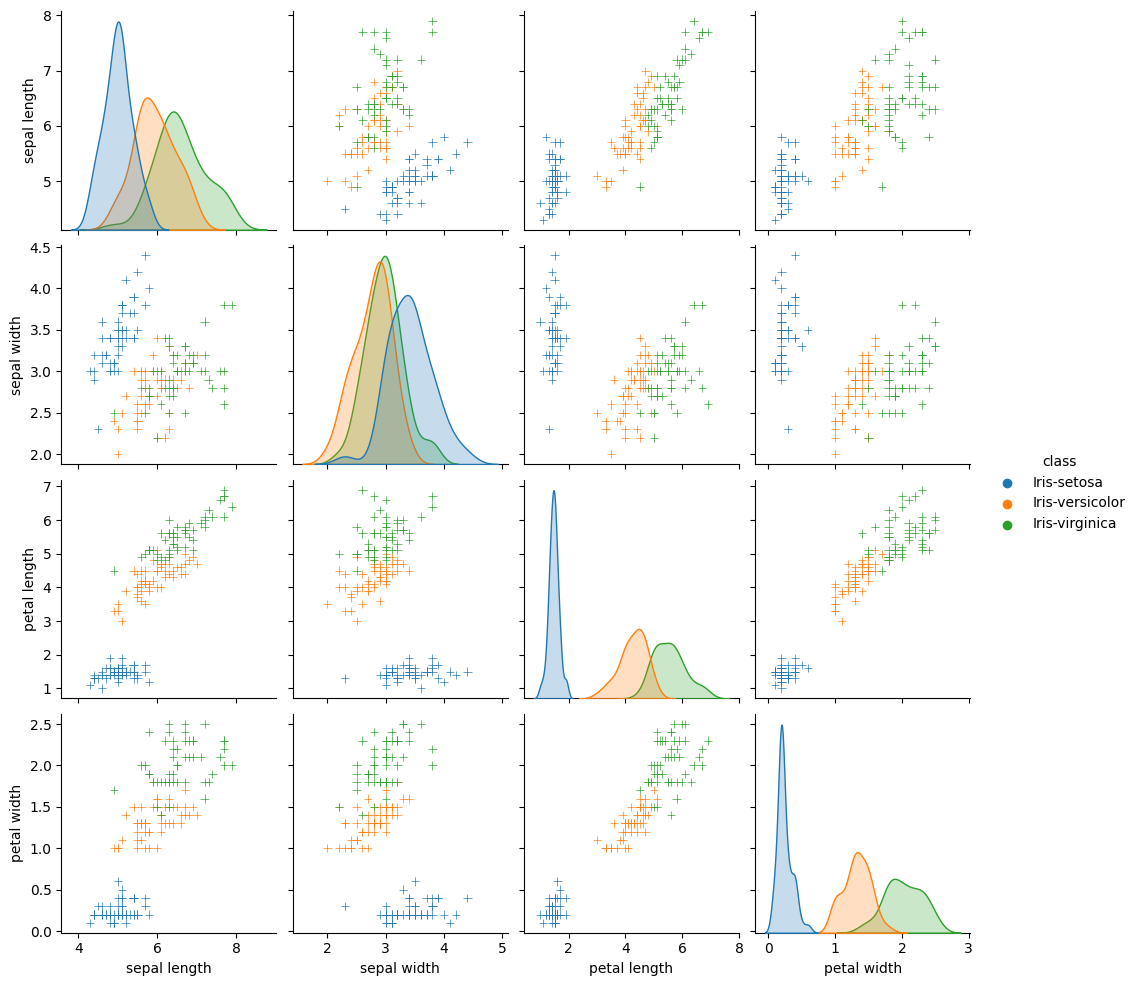

In [144]:
m = sns.pairplot(df, hue='class', markers='+')
plt.show()


## Set X,y and split the data using `train_test_split`




In [145]:
X = df.drop('class',axis=1)
y = df['class']


In [40]:
x_train, x_test , y_train , y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2)


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , classification_report , recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Using `KNN` for iris Classification

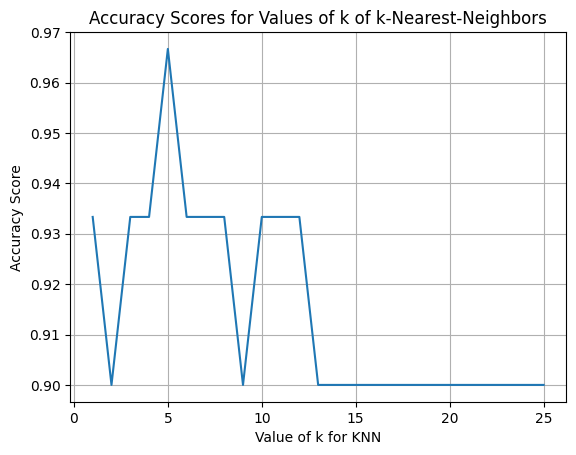

In [49]:
range_k = np.arange(1,26)
acc_all = []
for k in range_k :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test , y_pred = y_pred)
  acc_all.append(acc)

plt.plot(range_k, acc_all)
plt.xlabel('k Value for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of kNN')
plt.grid(True)
plt.show()

In [163]:
acc_knn = acc_all[11]

## Using `Support Vector Machine` for Iris Classification

In [51]:
clf = SVC()
clf.fit(x_train,y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = accuracy_score(y_test,y_pred_svc)

In [52]:
acc_svc

0.9

In [160]:
METRICS = {'accuracy_score': accuracy_score ,
           'precision_score':precision_score ,
           'f1_score' : f1_score ,
           'recall_score' : recall_score,
           'confusion_matrix' : confusion_matrix ,
           'classification_report': classification_report}
def train_and_prediction(model,x_train,x_test,y_train,y_test,metrics=METRICS):
  if model == 'LogisticcRegression':
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

  else :
    clf = model
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

  for k,v in metrics.items() :
    if k == 'precision_score' or k == 'f1_score' or k == 'recall_score' :
      tryy = v(y_test,y_pred,average='macro')
      print(f'The {k}  is {tryy:1f}')

    else:
      print(f'The {k}  is {v(y_test,y_pred)}')






In [161]:
knn = train_and_prediction(KNeighborsClassifier(n_neighbors=12),x_train,x_test,y_train,y_test,metrics=METRICS)
lr = train_and_prediction(LogisticRegression(),x_train,x_test,y_train,y_test,metrics=METRICS)

The accuracy_score  is 0.9333333333333333
The precision_score  is 0.944444
The f1_score  is 0.939394
The recall_score  is 0.944444
The confusion_matrix  is [[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]
The classification_report  is                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

The accuracy_score  is 0.9
The precision_score  is 0.909091
The f1_score  is 0.908903
The recall_score  is 0.911111
The confusion_matrix  is [[ 8  0  0]
 [ 0  9  1]
 [ 0  2 10]]
The classification_report  is                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.82      0.90      0.86      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix for KNN

<Axes: >

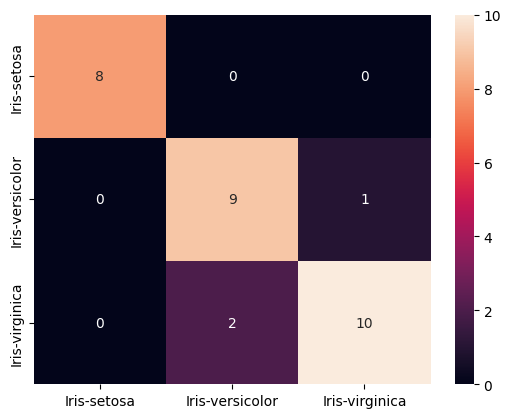

In [137]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            xticklabels = df['class'].unique(),
            yticklabels = df['class'].unique(),
            annot=True)

In [165]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_predlr = lr.predict(x_test)
acc_lr = accuracy_score(y_test,y_predlr)
acc_lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

### Confusion Matrix for Logistic Regression

<Axes: >

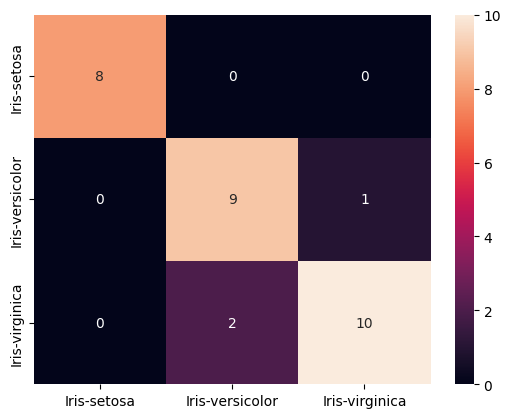

In [140]:
cmlr = confusion_matrix(y_test,y_predlr)
sns.heatmap(cmlr,
            xticklabels=df['class'].unique(),
            yticklabels = df['class'].unique(),
            annot=True)

## Comparasion between `KNN` , `SVC` and `Logistic Regression`

In [184]:
result = pd.DataFrame({'KNN ': acc_knn,
                       'SVC ': acc_svc,
                       'Logistic Regression': acc_lr},
                      index=['Accuracy Score'])

<Axes: >

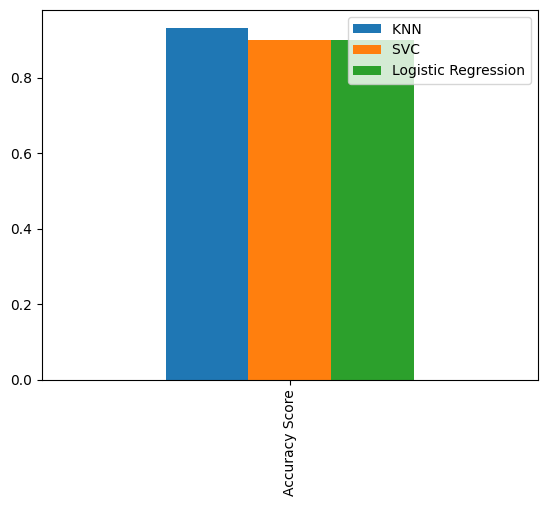

In [185]:
result.plot(kind='bar')